In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from IPython.display import Image

### Step 1.1: Use BeautifulSoup to extract all the table rows as a list. How many rows are there (including the header row)?

In [2]:
soup = BeautifulSoup(requests.get('https://pokemondb.net/pokedex/all').content, 'html.parser')

all_rows = soup.find_all('tr')
        
print('Number Of Rows : ', len(all_rows))

Number Of Rows :  927


### Step 1.2: Save the first row of the table (bulbasaur) as a variable. Using .find(), and .findall(), extract and print the following contents from that row. You may leave numbers as strings.
* The name of the pokemon
* The url to the pokemon's page
* The type or types (as a string separated by spaces, e.g. "Fire Flying")
* The total points
* In a single list (via appending): ID Number, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed (Hint: If you look carefully at the class names for these columns, you will see why those values should be processed together.)

In [30]:
bulbasur = all_rows[1]

id_etc = []
row_content = bulbasur.find_all('td')
for val in row_content:
    if 'cell-num' in val.get('class')[0]:
        id_etc.append(val.text)
    else:
        print(val.text)
    if val.get('class')[0] == 'cell-name':
        hyperlink = val.find('a')
        print(hyperlink['href'])
id_etc

Bulbasaur
/pokedex/bulbasaur
Grass Poison
318


['001', '45', '49', '49', '65', '65', '45']

### Step 1.3: Generalize step 1.2. Define a function that takes in a row of the pokedex table and returns it as a DataFrame with a single row. Create a single DataFrame by appending these rows. (Appending the data to a list or dictionary and then creating a DataFrame is also acceptable.) Make sure you skip the header row.

In [4]:
def create_data_frame(all_rows):
    header_names = []
    rows_data = []
    for row in all_rows:
        single_row_data = []
        headers = row.find_all('th')
        for header in headers:
            header_names.append(header.text)
            if header.text == 'Name':
                header_names.append('URL')
        row_content = row.find_all('td')
        for val in row_content:
            single_row_data.append(val.text)
            if val.get('class')[0] == 'cell-name':
                hyperlink = val.find('a')
                single_row_data.append(hyperlink['href'])
        if single_row_data:
            rows_data.append(single_row_data)

    return pd.DataFrame(rows_data, columns=header_names)

final_df = create_data_frame(all_rows)

final_df.head(5)

,#,Name,URL,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,Bulbasaur,/pokedex/bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,002,Ivysaur,/pokedex/ivysaur,Grass Poison,405,60,62,63,80,80,60
2,003,Venusaur,/pokedex/venusaur,Grass Poison,525,80,82,83,100,100,80
3,003,Venusaur Mega Venusaur,/pokedex/venusaur,Grass Poison,625,80,100,123,122,120,80
4,004,Charmander,/pokedex/charmander,Fire,309,39,52,43,60,50,65


## Exercise #2 - Cleaning the Pokedex
### Step 2.1: Add column names to the DataFrame. Convert strings to numeric where appropriate. Make the ID number the first column in the DataFrame if it is not already.

In [5]:
final_df['#'] = final_df['#'].astype('int')
final_df['Total'] = final_df['Total'].astype('int')
final_df['HP'] = final_df['HP'].astype('int')
final_df['Attack'] = final_df['Attack'].astype('int')
final_df['Defense'] = final_df['Defense'].astype('int')
final_df['Sp. Atk'] = final_df['Sp. Atk'].astype('int')
final_df['Sp. Def'] = final_df['Sp. Def'].astype('int')
final_df['Speed'] = final_df['Speed'].astype('int')
final_df['Type'] = final_df['Type'].str.strip()

In [6]:
print(final_df.dtypes)
final_df.head()

#           int64
Name       object
URL        object
Type       object
Total       int64
HP          int64
Attack      int64
Defense     int64
Sp. Atk     int64
Sp. Def     int64
Speed       int64
dtype: object


,#,Name,URL,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,/pokedex/bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,/pokedex/ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,/pokedex/venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,/pokedex/venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,/pokedex/charmander,Fire,309,39,52,43,60,50,65


### Step 2.2: Notice that the pokemon types are not mutually exclusive. (Pokemon may have more than one type.) Create 18 dummy variables for each type of pokemon.

In [7]:
types = []
for val in final_df.Type:
    types.extend(val.strip().split(' '))
unique_types = list(set(types))

types_data = []
for row in final_df.Type:
    row_type_dummy = [1 if typ in row else 0for typ in unique_types]
    types_data.append(row_type_dummy)

types_data = np.array(types_data)

for i, typ in enumerate(unique_types):
    final_df[typ] = types_data[:, i]
    
final_df.head()

,#,Name,URL,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Rock,Flying,Dragon,Ground,Ghost,Fairy,Water,Poison,Steel,Grass
0,1,Bulbasaur,/pokedex/bulbasaur,Grass Poison,318,45,49,49,65,65,...,0,0,0,0,0,0,0,1,0,1
1,2,Ivysaur,/pokedex/ivysaur,Grass Poison,405,60,62,63,80,80,...,0,0,0,0,0,0,0,1,0,1
2,3,Venusaur,/pokedex/venusaur,Grass Poison,525,80,82,83,100,100,...,0,0,0,0,0,0,0,1,0,1
3,3,Venusaur Mega Venusaur,/pokedex/venusaur,Grass Poison,625,80,100,123,122,120,...,0,0,0,0,0,0,0,1,0,1
4,4,Charmander,/pokedex/charmander,Fire,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,0,0


### Step 2.3: Remove duplicate values of pokemon based on the URL. (See Charizard as an example.) Keep the first observation in the case of a duplicate. Print the number of rows in the deduplicated dataset.

In [8]:
print('Before removing duplicates num of rows : %d'%final_df.shape[0])
final_df = final_df.drop_duplicates(subset=['URL'])
print('After removing duplicates num of rows : %d'%final_df.shape[0])

Before removing duplicates num of rows : 926
After removing duplicates num of rows : 809


In [9]:
final_df.head()

,#,Name,URL,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Rock,Flying,Dragon,Ground,Ghost,Fairy,Water,Poison,Steel,Grass
0,1,Bulbasaur,/pokedex/bulbasaur,Grass Poison,318,45,49,49,65,65,...,0,0,0,0,0,0,0,1,0,1
1,2,Ivysaur,/pokedex/ivysaur,Grass Poison,405,60,62,63,80,80,...,0,0,0,0,0,0,0,1,0,1
2,3,Venusaur,/pokedex/venusaur,Grass Poison,525,80,82,83,100,100,...,0,0,0,0,0,0,0,1,0,1
4,4,Charmander,/pokedex/charmander,Fire,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,0,0
5,5,Charmeleon,/pokedex/charmeleon,Fire,405,58,64,58,80,65,...,0,0,0,0,0,0,0,0,0,0


### Step 2.4: For the next exercise, we wish to create a sample of the pokemon. (Note: this sample is not a true random sample since the data is already sorted on ID number.) Add a dummy variable to the DataFrame called "sample" that tags every 4th pokemon to be included in the sample. For example, if the pokemon were [A, B, C, D, E, F, G, H, I], pokemon D and H would be in the sample. (Suggested Hint: Use row numbers/indices and modular arithmetic.)

In [10]:
final_df['Sample'] = ['sample' if i%4 == 0 else None for i in final_df['#']]

In [11]:
final_df.head(12)

,#,Name,URL,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Flying,Dragon,Ground,Ghost,Fairy,Water,Poison,Steel,Grass,Sample
0,1,Bulbasaur,/pokedex/bulbasaur,Grass Poison,318,45,49,49,65,65,...,0,0,0,0,0,0,1,0,1,None
1,2,Ivysaur,/pokedex/ivysaur,Grass Poison,405,60,62,63,80,80,...,0,0,0,0,0,0,1,0,1,None
2,3,Venusaur,/pokedex/venusaur,Grass Poison,525,80,82,83,100,100,...,0,0,0,0,0,0,1,0,1,None
4,4,Charmander,/pokedex/charmander,Fire,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,0,sample
5,5,Charmeleon,/pokedex/charmeleon,Fire,405,58,64,58,80,65,...,0,0,0,0,0,0,0,0,0,None
6,6,Charizard,/pokedex/charizard,Fire Flying,534,78,84,78,109,85,...,1,0,0,0,0,0,0,0,0,None
9,7,Squirtle,/pokedex/squirtle,Water,314,44,48,65,50,64,...,0,0,0,0,0,1,0,0,0,None
10,8,Wartortle,/pokedex/wartortle,Water,405,59,63,80,65,80,...,0,0,0,0,0,1,0,0,0,sample
11,9,Blastoise,/pokedex/blastoise,Water,530,79,83,100,85,105,...,0,0,0,0,0,1,0,0,0,None
13,10,Caterpie,/pokedex/caterpie,Bug,195,45,30,35,20,20,...,0,0,0,0,0,0,0,0,0,None


In [12]:
final_df[final_df.Sample == 'sample'].head()

,#,Name,URL,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Flying,Dragon,Ground,Ghost,Fairy,Water,Poison,Steel,Grass,Sample
4,4,Charmander,/pokedex/charmander,Fire,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,0,sample
10,8,Wartortle,/pokedex/wartortle,Water,405,59,63,80,65,80,...,0,0,0,0,0,1,0,0,0,sample
15,12,Butterfree,/pokedex/butterfree,Bug Flying,395,60,45,50,90,80,...,1,0,0,0,0,0,0,0,0,sample
20,16,Pidgey,/pokedex/pidgey,Normal Flying,251,40,45,40,35,35,...,1,0,0,0,0,0,0,0,0,sample
26,20,Raticate,/pokedex/raticate,Normal,413,55,81,60,50,70,...,0,0,0,0,0,0,0,0,0,sample


## Exercise #3 - Scraping Individual Pages

### Step 3.1: Scrape the main image for Bulbasaur in a general way that could be applied to other pokemon pages by searching for the relevant tag and extracting the image URL. Display the image in your Jupyter notebook using code. (Take a look at last year's exam for an example of how to do this using the Image module from iPython.display.)

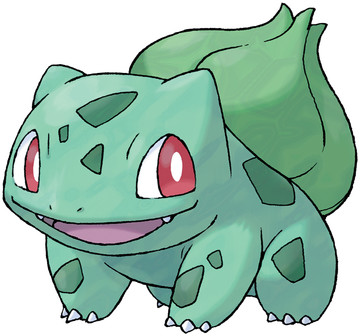

In [13]:
pokemon_name = 'bulbasaur'
soup = BeautifulSoup(requests.get('https://pokemondb.net/pokedex/%s'%pokemon_name).content)
image_url = soup.find_all('img')[0]['src']
image_content = requests.get(image_url).content
Image(data=image_content)

### Step 3.2: Extract the location table. Use pd.read_html() to extract all of the tables from the Bulbasaur page. To do this, you must be a little "sneaky" because pokemondb does not accept the headers (browser info) passed by pandas. Use the code below which utilizes requests. Then, manually look through the returned tables until you find the table that contains the locations for Bulbasaur. (Hint: To save time, start at index 10 until you find it.)

* tables = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text)
* Show the desired DataFrame for the locations table in your notebook.

In [14]:
pokemon_name = 'bulbasaur'
url = 'https://pokemondb.net/pokedex/%s'%pokemon_name
tables = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text)

In [15]:
for table in tables:
    print(table.head())

            0                  1
0  National №                001
1        Type       Grass Poison
2     Species       Seed Pokémon
3      Height      0.7 m (2′04″)
4      Weight  6.9 kg (15.2 lbs)
                 0                                 1
0         EV yield                  1 Special Attack
1       Catch rate  45 (5.9% with PokéBall, full HP)
2  Base Friendship                       70 (normal)
3        Base Exp.                                64
4      Growth Rate                       Medium Slow
            0                         1
0  Egg Groups            Grass, Monster
1      Gender  87.5% male, 12.5% female
2  Egg cycles    20 (4,884–5,140 steps)
         0   1   2    3    4
0       HP  45 NaN  200  294
1   Attack  49 NaN   92  216
2  Defense  49 NaN   92  216
3  Sp. Atk  65 NaN  121  251
4  Sp. Def  65 NaN  121  251
   Nor  Fir Wat Ele Gra  Ice Fig  Poi  Gro
0  NaN    2   ½   ½   ¼    2   ½  NaN  NaN
   Fly  Psy  Bug  Roc  Gho  Dra  Dar  Ste Fai
0    2    2  NaN  

In [16]:
tables[-2]

,0,1
0,RedBlue,Pallet Town
1,Yellow,Cerulean City
2,GoldSilverCrystal,Trade/migrate from another game
3,RubySapphire,Trade/migrate from another game
4,FireRedLeafGreen,Pallet Town
5,Emerald,Trade/migrate from another game
6,DiamondPearlPlatinum,Trade/migrate from another game
7,HeartGoldSoulSilver,Pallet Town
8,BlackWhiteBlack 2White 2,Trade/migrate from another game
9,XY,Lumiose City


### Step 3.3: Transpose the DataFrame such that each column is a video game and each row/cell is the location where you find Bulbasaur in that game. (e.g. the column 'RedBlue' contains 'Pallet Town').

In [17]:
game_dataframe = pd.DataFrame([tables[-2][1].values], columns=tables[-2][0].values)
print(game_dataframe.shape)
game_dataframe

(1, 14)


,RedBlue,Yellow,GoldSilverCrystal,RubySapphire,FireRedLeafGreen,Emerald,DiamondPearlPlatinum,HeartGoldSoulSilver,BlackWhiteBlack 2White 2,XY,Omega RubyAlpha Sapphire,SunMoon,Ultra SunUltra Moon,Let's Go PikachuLet's Go Eevee
0,Pallet Town,Cerulean City,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Lumiose City,Trade/migrate from another game,Trade/migrate from another game,Route 2,"Cerulean City, Viridian Forest"


### Step 3.4: Across all the pokemon pages, the location table is almost* always the second to last table on the page. (Use an index of -2.) Extract the location table and transpose it for all the pokemon in the sample (see step 2.4). Make sure you include wait time in your code or some other method to ensure that you are not blocked from the site after you request each page. Unfortunately, the location table is not in the same format for every page, so we will be extracting only the information for the X and Y games in the following steps.

* Check if the the column 'XY' is in the DataFrame. If so, create a new DataFrame with only the name or URL for the pokemon and the 'XY' column. Append that DataFrame to a list to concatenate with the other pokemon that have the XY location column.
* Create a single DataFrame that contains the name or URL of the pokemon and the XY location.
* Append all the sample pokemon and their XY locations to a single DataFrame.
* You should get 141 sample pokemon that meet this criteria.
* One sample pokemon (Meltan) has a page that will not work using this method. You can either remove Meltan from your sample or wrap your scraping code in a try/except statement.

In [18]:
rows_data, columns, pokemons = [], game_dataframe.columns, []
for pokemon_name in final_df[final_df.Sample == 'sample'].Name:
    url = 'https://pokemondb.net/pokedex/%s'%pokemon_name
    try:
        tables = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}, timeout=3).text)
        game_dataframe = pd.DataFrame([tables[-2][1].values], columns=tables[-2][0].values)
        game_dataframe.columns = [col.strip() for col in game_dataframe.columns]
    except:
        continue
    if game_dataframe.shape[0]>0 and 'XY' in game_dataframe.columns:
        rows_data.append(game_dataframe[['XY']].values[0][0])
        pokemons.append(pokemon_name)
        
print('Number Of Rows : ', len(rows_data))

Number Of Rows :  140


In [19]:
locations_data = pd.DataFrame(rows_data, columns=['XY'], index=pokemons)
print('Locations Data : ',locations_data.shape)
locations_data.head()

Locations Data :  (140, 1)


,XY
Charmander,Lumiose City
Wartortle,Evolve Squirtle
Butterfree,Evolve Caterpie/Metapod
Pidgey,"Route 2, 3"
Raticate,Trade/migrate from another game


## Exercise #4 - Analysis
Step 4.1: Use the full sample of pokemon from the pokedex DataFrame. Create a table that shows the average attack and defense for each type. Each type should be a row. Average attack and defense should be columns. Which type has the highest and lowest average attack? Average defense? (Note: There are multiple approaches you could use here given the categories are not mutually exclusive.)

In [20]:
avg_atck_defence_per_type = final_df.groupby(by='Type').mean()[['Attack', 'Defense']].rename(columns={'Attack': 'Avg. Attack', 'Defense': 'Avg. Defense'})
avg_atck_defence_per_type.head()

,Avg. Attack,Avg. Defense
Type,,
Bug,51.000000,57.055556
Bug Electric,69.000000,73.750000
Bug Fairy,50.000000,50.000000
Bug Fighting,133.666667,83.666667
Bug Fire,72.500000,60.000000


In [21]:
sorted_vals = avg_atck_defence_per_type.sort_values(by='Avg. Attack')

print('Min Avg Attack, Type : (%s - %d), Max Avg Attack, Type : (%s - %d)'%(sorted_vals.index[0], sorted_vals['Avg. Attack'][0],sorted_vals.index[-1], sorted_vals['Avg. Attack'][-1]))

Min Avg Attack, Type : (Ice Psychic - 40), Max Avg Attack, Type : (Dragon Electric - 150)


In [22]:
sorted_vals = avg_atck_defence_per_type.sort_values(by='Avg. Defense')

print('Min Avg Defense, Type : (%s - %d), Max Avg Defense, Type : (%s - %d)'%(sorted_vals.index[0], sorted_vals['Avg. Defense'][0],sorted_vals.index[-1], sorted_vals['Avg. Defense'][-1]))

Min Avg Defense, Type : (Ice Psychic - 25), Max Avg Defense, Type : (Steel Ground - 200)


### Step 4.2: Join the pokedex data to the location DataFrame created in Step 3.4. (Exclude pokemon that are not in the sample.) For the locations in pokemon X/Y, calculate the average total points for each location. Which location has the highest average total point score?

In [23]:
combined_locations_general_data = locations_data.join(final_df.set_index('Name'), how='left')
combined_locations_general_data = combined_locations_general_data.reset_index()
print(combined_locations_general_data.shape)
combined_locations_general_data.head()

(140, 31)


,index,XY,#,URL,Type,Total,HP,Attack,Defense,Sp. Atk,...,Flying,Dragon,Ground,Ghost,Fairy,Water,Poison,Steel,Grass,Sample
0,Charmander,Lumiose City,4,/pokedex/charmander,Fire,309,39,52,43,60,...,0,0,0,0,0,0,0,0,0,sample
1,Wartortle,Evolve Squirtle,8,/pokedex/wartortle,Water,405,59,63,80,65,...,0,0,0,0,0,1,0,0,0,sample
2,Butterfree,Evolve Caterpie/Metapod,12,/pokedex/butterfree,Bug Flying,395,60,45,50,90,...,1,0,0,0,0,0,0,0,0,sample
3,Pidgey,"Route 2, 3",16,/pokedex/pidgey,Normal Flying,251,40,45,40,35,...,1,0,0,0,0,0,0,0,0,sample
4,Raticate,Trade/migrate from another game,20,/pokedex/raticate,Normal,413,55,81,60,50,...,0,0,0,0,0,0,0,0,0,sample


In [24]:
avg_total_point_per_location = combined_locations_general_data.groupby(by='XY').mean()[['Total']]
avg_total_point_per_location.head()

,Total
XY,
Ambrette Town,355.5
Breed Electrode,330.0
Breed Gurdurr/Conkeldurr,305.0
Breed Hariyama,237.0
Breed Haunter/Gengar,310.0


In [25]:
avg_total_point_per_location.sort_values(by='Total', ascending=False).head()

,Total
XY,
"Sea Spirit's Den, Roaming Kalos",580.0
Evolve Vanillite/Vanillish,535.0
Evolve Chespin/Quilladin,530.0
Tower of Mastery,525.0
Evolve Mienfoo,510.0


Location **Sea Spirit's Den, Roaming Kalos** has highest total as we can see above from sorted values.